In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Question 6
#### Compare latency of different protocol for the same DNS server 8.8.8.8

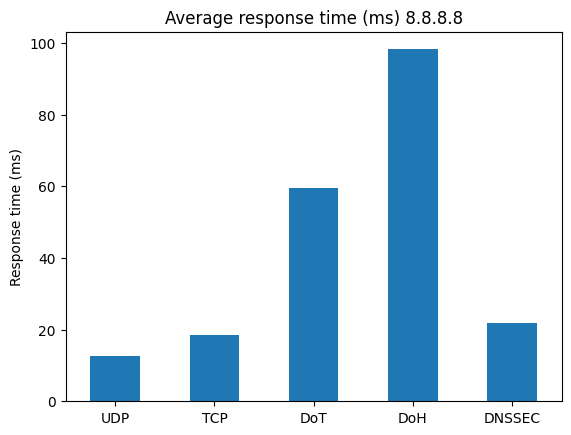

In [5]:
data = pd.read_json('Reordered data/quest_6.1_all_8888.json')
chart = data.plot(y = 'r_avg', x = 'mode', kind = 'bar', legend = False, title = 'Average response time (ms) 8.8.8.8')
chart.set_xlabel('')
chart.set_ylabel('Response time (ms)', rotation = 90)
chart.tick_params(axis = 'x', labelrotation = 0)

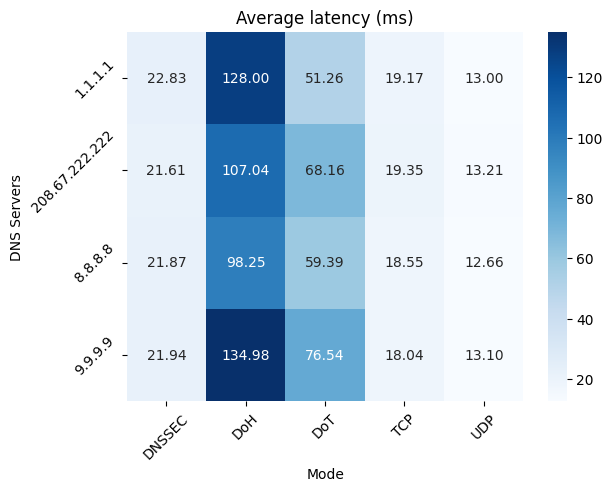

In [3]:
data = pd.read_json('Reordered data/quest_6.1_all.json')
data_pivot = data.pivot(index = 'resolver', columns = 'mode', values = 'r_avg')
data_pivot.drop(index = '193.204.35.27', inplace = True)
hmap = sns.heatmap(data_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
hmap.set_xlabel('Mode')
hmap.set_ylabel('DNS Servers')
plt.title('Average latency (ms)')
plt.show()



### Quest 7
#### Compare the response time with respect to:
#### - Geographical Location
#### - Query type

In [7]:
data = pd.read_json('Reordered data/quest_6.2_all.json')
data.head(2)

,type,hostname,timestamp,r_min,r_avg,resolver,location,r_max,r_lost_percent,s_ttl,text_flags,flags,rcode,rcode_text
0,A,google.com,2023-04-26 15:09:48.584794,11.945972,12.556453,88.220.66.4,Poland,21.906624,0.0,157,QR -- -- RD RA -- --,33152,0,NOERROR
1,A,google.com,2023-04-26 15:09:48.877057,12.004623,12.680063,82.199.35.101,Spain,17.788181,0.0,157,QR -- -- RD RA -- --,33152,0,NOERROR


/tmp/ipykernel_5158/3325283995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  location = data.groupby('location').mean()


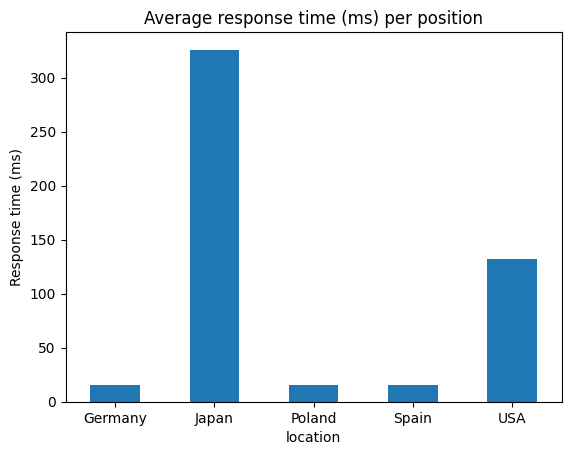

In [8]:
location = data.groupby('location').mean()
chart = location.plot(y = 'r_avg', kind = 'bar', legend = False, title = 'Average response time (ms) per position')
chart.set_ylabel('Response time (ms)', rotation = 90)
chart.tick_params(axis = 'x', labelrotation = 0)

/tmp/ipykernel_5158/3298581411.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  type = data.groupby('type').mean()


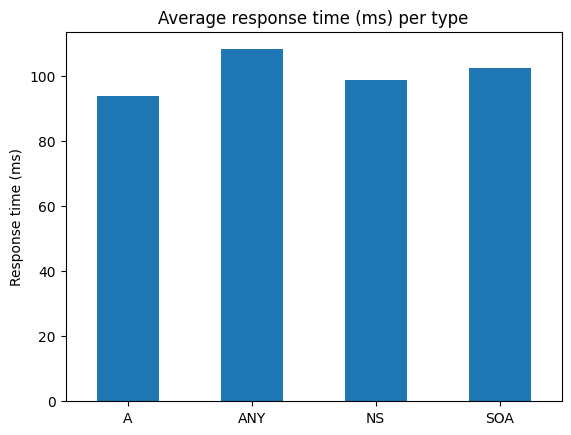

In [9]:
type = data.groupby('type').mean()
chart = type.plot(y = 'r_avg', kind = 'bar', legend = False, title = 'Average response time (ms) per type')
chart.set_xlabel('')
chart.set_ylabel('Response time (ms)', rotation = 90)
chart.tick_params(axis = 'x', labelrotation = 0)

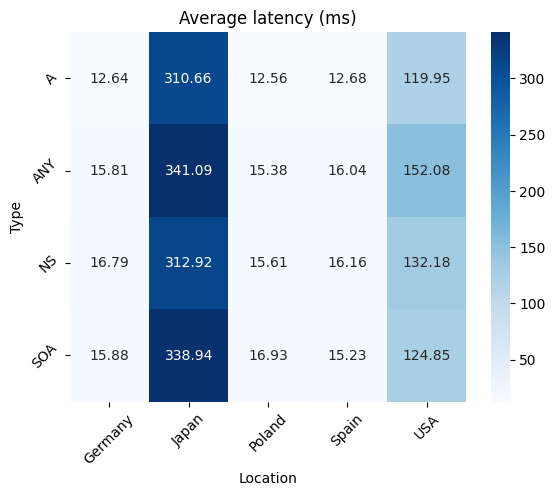

In [7]:
data_pivot = data.pivot(index = 'type', columns = 'location', values = 'r_avg')
hmap = sns.heatmap(data_pivot, annot=True, fmt='.2f', cmap='Blues')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
hmap.set_xlabel('Location')
hmap.set_ylabel('Type')
plt.title('Average latency (ms)')
plt.show()

### Quest 7
#### See if relationship between number of hops and response time is present

[Text(0, 0, '13'),
 Text(0, 0, '13.21'),
 Text(0, 0, '13.1'),
 Text(0, 0, '12.64'),
 Text(0, 0, '12.66'),
 Text(0, 0, '12.56'),
 Text(0, 0, '12.68'),
 Text(0, 0, '310.66'),
 Text(0, 0, '119.95')]

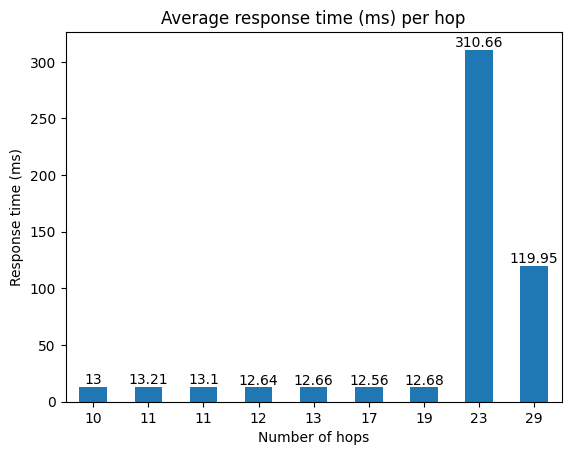

In [64]:
data = pd.read_json('Reordered data/quest_6.3.json')
del data['query']
data['hops'] = data['hops'].astype(int)
data['time (ms)'] = data['time (ms)'].round(2)
data.sort_values(by = 'hops', inplace = True)
chart = data.plot(x = 'hops', y = 'time (ms)', kind = 'bar', title = 'Average response time (ms) per hop', legend = False)
chart.set_xlabel('Number of hops')
chart.set_ylabel('Response time (ms)', rotation = 90)
plt.xticks(rotation = 0)
chart.bar_label(chart.containers[0])